In [1]:
from Bio import SeqIO

In [50]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import re
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def string_to_array(seq_string):
   seq_string = seq_string.lower()
   seq_string = re.sub('[^acgt]', 'n', seq_string)
   seq_string = np.array(list(seq_string))
   return seq_string

In [3]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(np.array(['a','c','g','t','z']))

LabelEncoder()

In [4]:
def ordinal_encoder(my_array):
    integer_encoded = label_encoder.transform(my_array)
    float_encoded = integer_encoded.astype(float)
    float_encoded[float_encoded == 0] = 0.25
    float_encoded[float_encoded == 1] = 0.50 
    float_encoded[float_encoded == 2] = 0.75 
    float_encoded[float_encoded == 3] = 1.00 
    float_encoded[float_encoded == 4] = 0.00 
    return float_encoded

In [8]:
def one_hot_encoder(seq_string):
    int_encoded = label_encoder.transform(seq_string)
    onehot_encoder = OneHotEncoder(sparse=False, dtype=int)
    int_encoded = int_encoded.reshape(len(int_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(int_encoded)
    onehot_encoded = np.delete(onehot_encoded, -1, 1)
    return onehot_encoded

In [10]:
def Kmers_funct(seq, size):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]

In [12]:
words = Kmers_funct(mySeq, size=10)
joined_sentence = ' '.join(words)
joined_sentence

'gtgcccaggt tgcccaggtt gcccaggttc cccaggttca ccaggttcag caggttcagt aggttcagtg ggttcagtga gttcagtgag ttcagtgagt tcagtgagtg cagtgagtga agtgagtgac gtgagtgaca tgagtgacac gagtgacaca agtgacacag gtgacacagg tgacacaggc gacacaggca acacaggcag'

In [13]:
mySeq1 = 'CTCACCTGTACAATCACACCCCATGTGC'
mySeq2 = 'GGTTCAGTGACCCAGGTGACCAGACAGG'
sentence1 = ' '.join(Kmers_funct(mySeq1, size=10))
sentence2 = ' '.join(Kmers_funct(mySeq2, size=10))

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform([joined_sentence, sentence1, sentence2]).toarray()
X

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
        1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1],
       [1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0]])

In [16]:
%matplotlib inline
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dna-sequence-dataset/dog.txt
/kaggle/input/dna-sequence-dataset/example_dna.fa
/kaggle/input/dna-sequence-dataset/human.txt
/kaggle/input/dna-sequence-dataset/chimpanzee.txt


In [17]:
human_dna = pd.read_table('../input/dna-sequence-dataset/human.txt')
human_dna.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


Text(0.5, 1.0, 'Human DNA')

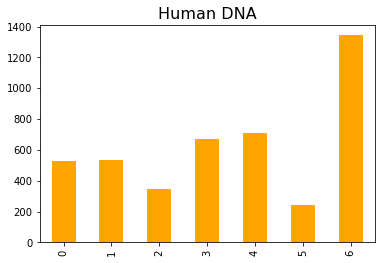

In [23]:
plot_color = 'orange'
human_dna['class'].value_counts().sort_index().plot.bar(color=plot_color)
plt.title("Human DNA", fontsize=16)

In [19]:
chimp_dna = pd.read_table('../input/dna-sequence-dataset/chimpanzee.txt')
chimp_dna.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


Text(0.5, 1.0, 'Chimpanzee DNA')

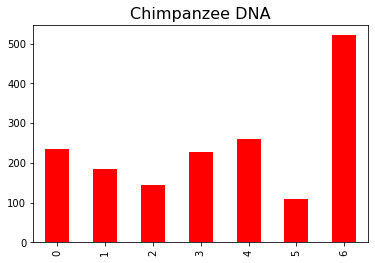

In [24]:
plot_color = 'red'
chimp_dna['class'].value_counts().sort_index().plot.bar(color=plot_color)
plt.title("Chimpanzee DNA", fontsize=16)

In [21]:
dog_dna = pd.read_table('../input/dna-sequence-dataset/dog.txt')
dog_dna.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


Text(0.5, 1.0, 'Dog DNA')

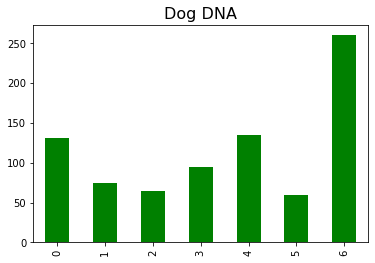

In [25]:
plot_color = 'green'
dog_dna['class'].value_counts().sort_index().plot.bar(color=plot_color)
plt.title("Dog DNA", fontsize=16)

In [26]:
def Kmers_funct(seq, size=6):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]

human_dna['words'] = human_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
human_dna = human_dna.drop('sequence', axis=1)

chimp_dna['words'] = chimp_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
chimp_dna = chimp_dna.drop('sequence', axis=1)

dog_dna['words'] = dog_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
dog_dna = dog_dna.drop('sequence', axis=1)

In [27]:
human_dna.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [29]:
human_texts = list(human_dna['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
y_human = human_dna.iloc[:, 0].values

In [30]:
chimp_texts = list(chimp_dna['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
y_chim = chimp_dna.iloc[:, 0].values 

In [31]:
dog_texts = list(dog_dna['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
y_dog = dog_dna.iloc[:, 0].values

In [32]:
y_human

array([4, 4, 3, ..., 6, 6, 6])

In [33]:
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(human_texts)
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)

In [34]:
print(X.shape)
print(X_chimp.shape)
print(X_dog.shape)

(4380, 232414)
(1682, 232414)
(820, 232414)


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_human, test_size = 0.20, random_state=42)

In [36]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [37]:
y_pred = classifier.predict(X_test)

Text(87.0, 0.5, 'Actual')

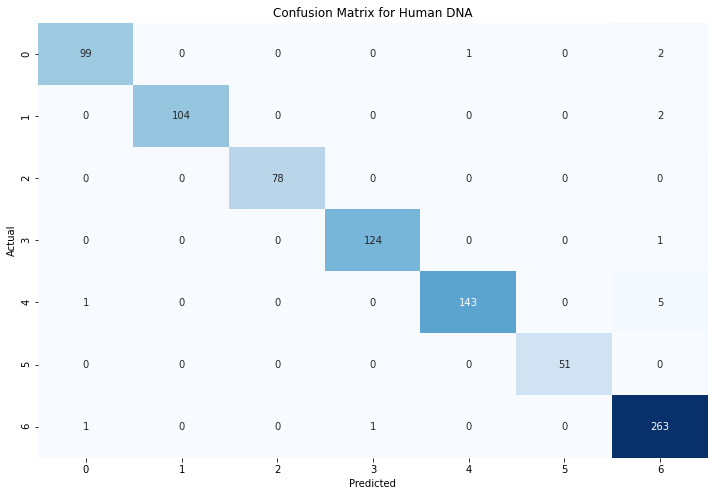

In [51]:
conf_matrix = pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted'))
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix for Human DNA")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [56]:
# def get_metrics(y_test, y_predicted):
#     accuracy = accuracy_score(y_test, y_predicted)
#     precision = precision_score(y_test, y_predicted, average='weighted')
#     recall = recall_score(y_test, y_predicted, average='weighted')
#     f1 = f1_score(y_test, y_predicted, average='weighted')
#     return accuracy, precision, recall, f1
# accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
# print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

print("accuracy =",accuracy)
print("precision =", precision)

accuracy = 0.9840182648401826
precision = 0.984290543482443


In [46]:
y_pred_chimp = classifier.predict(X_chimp)

Text(87.0, 0.5, 'Actual')

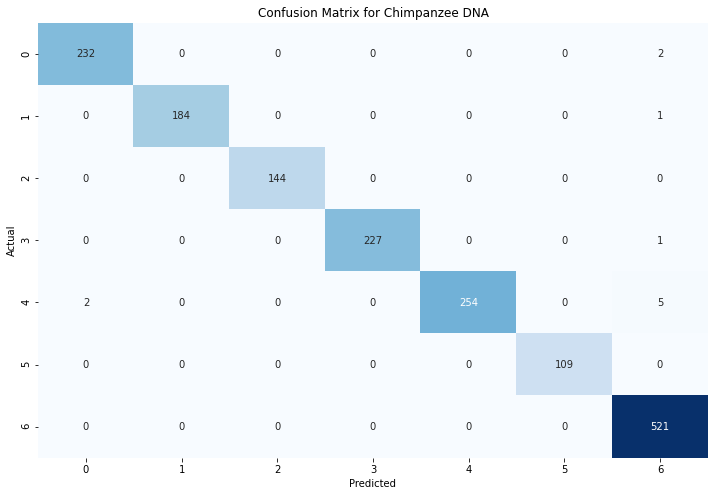

In [49]:
# Assuming y_chim and y_pred_chimp are the actual and predicted labels
conf_matrix = pd.crosstab(pd.Series(y_chim, name='Actual'), pd.Series(y_pred_chimp, name='Predicted'))
# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix for Chimpanzee DNA")
plt.xlabel("Predicted")
plt.ylabel("Actual")

Let us now do predictions on Dog test DNA sequence.

In [54]:
y_pred_dog = classifier.predict(X_dog)

Text(87.0, 0.5, 'Actual')

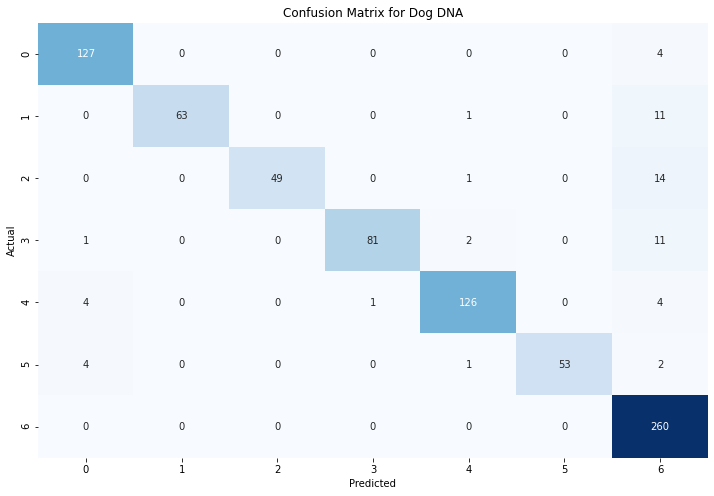

In [55]:
conf_matrix = pd.crosstab(pd.Series(y_dog, name='Actual'), pd.Series(y_pred_dog, name='Predicted'))
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix for Dog DNA")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [66]:
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy-human = %.3f, precision-human = %.3f, recall-human = %.3f" % (accuracy, precision, recall))

accuracy, precision, recall, f1 = get_metrics(y_chim, y_pred_chimp)
print("accuracy-chimp = %.3f, precision-chimp = %.3f, recall-chimp = %.3f" % (accuracy, precision, recall))

accuracy, precision, recall, f1 = get_metrics(y_dog, y_pred_dog)
print("accuracy-dog = %.3f, precision-dog = %.3f, recall-dog = %.3f" % (accuracy, precision, recall))

accuracy-human = 0.984, precision-human = 0.984, recall-human = 0.984
accuracy-chimp = 0.993, precision-chimp = 0.994, recall-chimp = 0.993
accuracy-dog = 0.926, precision-dog = 0.934, recall-dog = 0.926
